<div style="text-align: center; color:rgb(0, 0, 0); font-family: Arial, sans-serif; background-color:rgb(137, 200, 129); padding: 10px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 1.2); line-height: 0.1;">

### **Series de Tiempo**
#### **Universidad Central**
#### Maestría en Analítica de Datos
#### Docente: Wilson Sandoval Rodriguez
##### wsandovalr@ucentral.edu.co

</div>

<div style="text-align: center; color: #5a8d84; font-family: Arial, sans-serif; background-color:rgb(244, 228, 200); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">

# **1. Introducción a las series de tiempo** <a class="anchor" id="1"></a>
</div>

<div style=" font-family: Arial, sans-serif; background-color:rgb(237, 245, 249); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">


-   **objetivo:** Aprender y aplicar métodos estadísticos para el
    análisis de los datos que se han observado a lo largo del tiempo.

-   **Desafío**  dar cuenta de la correlación entre las
    mediciones que están cerca en el tiempo. Los temas cubiertos en este
    curso incluyen métodos para:

-   Modelado de datos de series temporales univariantes con modelos
    autorregresivos y de media móvil (denominados modelos ARIMA, a veces
    llamados modelos Box Jenkins).

-   Herramientas para la identificación del modelo, la estimación del
    modelo y la evaluación de la idoneidad del modelo.

-   Usar un modelo para pronosticar y determinar intervalos de
    predicción para pronósticos.


<div style=" font-family: Arial, sans-serif; background-color:rgb(244, 228, 200); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">


| Año         | Hito                                                        | Descripción                                                                                             |
|-------------|-------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| 1920s       | Modelos autoregresivos y descomposición (Yule, Slutsky)     | Conceptos iniciales sobre modelos autoregresivos y la descomposición en tendencia, estacionalidad, ciclo y error. |
| 1930s–1940s | Procesos estocásticos y filtrado (Kolmogorov, Wiener)         | Establecimiento de fundamentos en teoría de procesos estocásticos y técnicas de filtrado para series de tiempo.    |
| 1960s       | Filtro de Kalman y modelos de espacio de estados            | Introducción del filtro de Kalman y el uso de modelos de espacio de estados para la estimación en sistemas dinámicos. |
| 1970s       | Revolución Box-Jenkins (ARIMA)                              | Consolidación del modelo ARIMA como estándar para el análisis y pronóstico de series temporales.                |
| 1997        | Aparición de LSTM                                           | Se introducen las LSTM, una variante de RNN que mejora el modelado de dependencias a largo plazo en datos secuenciales. |
| 2000s       | Era del Big Data y machine learning                         | Integración de machine learning con métodos clásicos, impulsada por el auge del Big Data.                       |
| 2017        | Lanzamiento de Facebook Prophet                             | Presentación de Prophet, una herramienta de código abierto para pronósticos que automatiza el manejo de estacionalidades y tendencias. |
| 2020s       | Deep learning y análisis en tiempo real                     | Avances en deep learning aplicados al análisis en tiempo real, detección de anomalías y modelado multivariante.   |


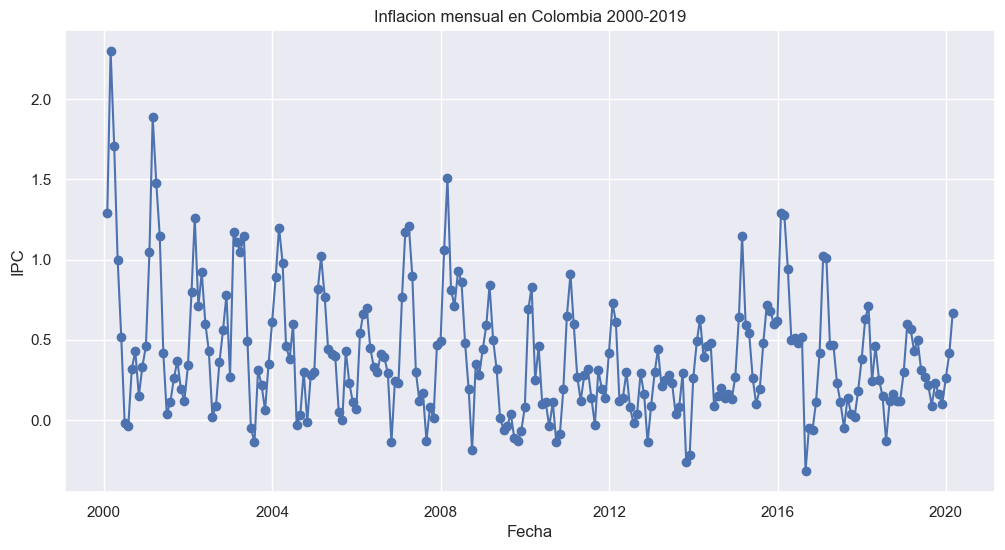

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="dark", color_codes=True)

# Generar un rango de fechas
dates = pd.date_range(start='2000-01-31', end="2020-02-29", freq='ME')
df = pd.read_excel("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/INFLACION.xlsx")
df.index = dates


# Visualizar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Inflación mensual"]*100, marker='o', linestyle='-', color='b')
plt.title('Inflacion mensual en Colombia 2000-2019')
plt.xlabel('Fecha')
plt.ylabel('IPC')
plt.grid(True)
plt.show()


---
<div  style="color: #5a8d84">

### **Definición:**

</div>

---


Una $\textbf{serie de tiempo}$ es una secuencia de datos numéricos observados o registrados en puntos sucesivos en el tiempo, generalmente a intervalos uniformemente espaciados. Matemáticamente, una serie de tiempo se define como una colección de observaciones $(x_t)$ donde $t$ denota el tiempo y $x_t$ es el valor de la observación en el tiempo $t$.

Formalmente, se puede expresar como:
$$\{x_t\}_{t \in T} = \{x_t\}, \quad t \in T$$
donde:


- $ \{x_t\} $ representa la serie de tiempo,
- $t$ es el índice temporal, y
- $T$ es el conjunto de todos los puntos en el tiempo en los cuales las observaciones se han realizado, como $T = \{t_1, t_2, t_3, \ldots, t_n\} $.

Las series de tiempo pueden ser:

- **Determinísticas** Una serie de tiempo es determinística si su comportamiento puede ser descrito completamente por una función matemática sin componentes aleatorias. En otras palabras, dado un modelo matemático y los valores iniciales, se puede predecir el valor futuro de la serie con exactitud.
  
- **Estocásticas** sna serie de tiempo es estocástica si incluye componentes aleatorias, lo que significa que no se puede predecir con certeza el valor futuro de la serie, incluso conociendo el modelo matemático subyacente. Estas series incorporan variabilidad inherente y están sujetas a incertidumbre.

<div style=" font-family: Arial, sans-serif; background-color:rgb(237, 245, 249); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">

### **Objetivos básicos del análisis**

El objetivo básico generalmente es determinar un modelo que describa el
patrón de las series de tiempo. Los usos para tal modelo son:

-   Describir las características importantes del patrón de series de
    tiempo.
-   Explicar cómo el pasado afecta el futuro o cómo dos series
    temporales pueden "interactuar".
-   Para pronosticar valores futuros de la serie.
-   Posiblemente sirva como un estándar de control para una variable que
    mide la calidad del producto en algunas situaciones de fabricación.

- La metodología de es una herramienta estadística que pretende estudiar un mismo fenómeno cuantitativo a través del tiempo con la finalidad de poder obtener pronósticos de forma asertiva.

- Esta metodología se utiliza ampliamente en los negocios, las ciencias sociales, las ciencias biológicas, y en muchas otras disciplinas.

<span style= "color: #5a8d84 ">

### **Economía y Marketing**

</span>

- Proyecciones del empleo y desempleo.
- Evolución del índice de precios de la leche.
- Beneficios netos mensuales de cierta entidad bancaria.
- Índices del precio del petróleo

<center>
  <img src="https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/economia.png" alt="economia" style="width: 600; height: 400;">
</center>




<span style= "color: #5a8d84 ">

### **Demografía**

</span>

- Número de habitantes por año.
- Tasa de mortalidad infantil por año.

<center>
    <img src="https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/demografia.png" width="350">
</center>





<div style= "color: #5a8d84; style="text-align: center ">

###  **Medioambiente**

</div>

  + Evolución horaria de niveles de óxido de azufre y de niveles de óxido de nitrógeno en una ciudad
durante una serie de años.
  + Lluvia recogida diariamente en una localidad.
  + Temperatura media mensual.
  + Medición diaria del contenido en residuos tóxicos en un río.

<center>

![Demografia](https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/medioambiente.png)

<div style= "color: #5a8d84; text-align: center;">

### **Algunos trabajos en series de tiempo**
</div>

<div style="display: flex; flex-wrap: wrap; justify-content: space-around;">

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Modelo de pronóstico para estimar el comportamiento del precio en bolsa de la energía en Colombia</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Análisis mediante series de tiempo de los resultados en matemáticas de las pruebas Saber 11 y niveles socioeconómicos NSE usando k-medias</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Desarrollo de una herramienta de predicción de rentas o ingresos. Caso de estudio empresa de servicios</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Propuesta de modelo ARIMA para la serie temporal de los casos de COVID-19 en Colombia aplicando la metodología Box and Jenkins</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Modelo de pronóstico para estimar el comportamiento del precio en bolsa de la energía en Colombia</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Modelo de impacto de las precipitaciones medias mensuales en el caudal mínimo mensual de las cuencas del río Cauca</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Análisis del crecimiento económico y la educación a nivel departamental en Colombia, mediante el modelo de datos panel</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Uso del modelo VAR de series de tiempo para pronosticar el incremento en el costo de los precios de los materiales en la construcción de infraestructura en Colombia</h4>
</div>

<div style="background: linear-gradient(to right, #f0f8ff, #e0f7fa); border-radius: 10px; padding: 10px; margin: 10px; width: 45%; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h4>Efectos de la tasa de cambio en la compra de software importado en América Latina</h4>
</div>

</div>

# Representación gráfica de series de tiempo


In [4]:
import pandas as pd
cafe=pd.read_excel("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/cafe.xlsx")
cafe

,fecha,Toneladas
0,2000-01-01,658.000000
1,2000-02-01,740.000000
2,2000-03-01,592.000000
3,2000-04-01,1055.000000
4,2000-05-01,1114.000000
...,...,...
290,2024-03-01,865.532563
291,2024-04-01,742.000000
292,2024-05-01,1120.000000
293,2024-06-01,1172.000000


## Graficando Series de Tiempo con Matplotlib


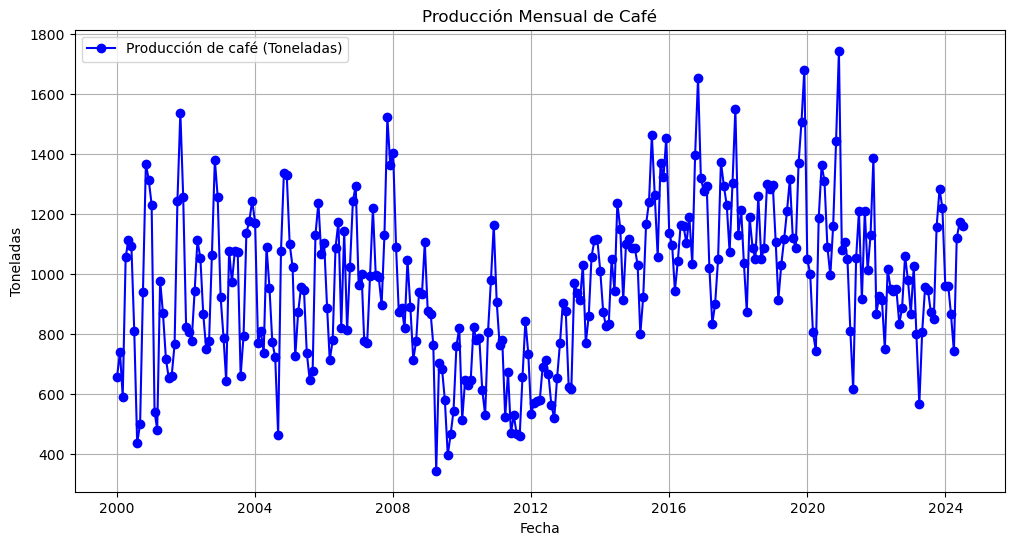

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar que la columna "fecha" sea tipo datetime
cafe["fecha"] = pd.to_datetime(cafe["fecha"])
cafe = cafe.set_index("fecha")  # Establecer la fecha como índice

# Graficar con Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(cafe.index, cafe["Toneladas"], marker='o', linestyle='-', color='b', label="Producción de café (Toneladas)")
plt.xlabel("Fecha")
plt.ylabel("Toneladas")
plt.title("Producción Mensual de Café")
plt.legend()
plt.grid(True)
plt.show()


## Visualización con Pandas (Rápida y sencilla)


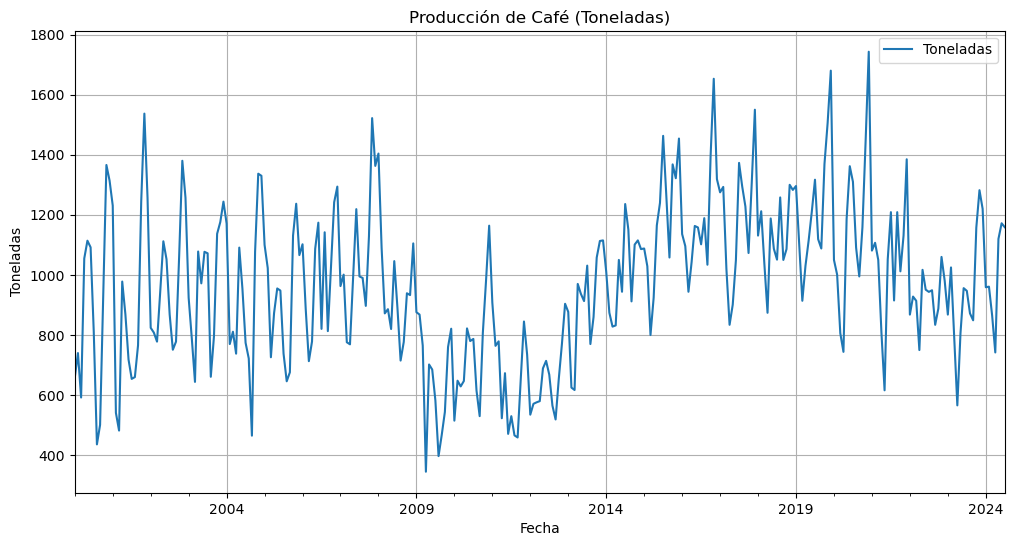

In [6]:

cafe.plot(figsize=(12, 6), title="Producción de Café (Toneladas)", legend=True, grid=True)
plt.xlabel("Fecha")
plt.ylabel("Toneladas")
plt.show()

In [8]:
import plotly.express as px

fig = px.line(cafe, x=cafe.index, y="Toneladas", title="Producción Mensual de Café con Plotly", markers=True)
fig.show()

## Visualización con Seaborn


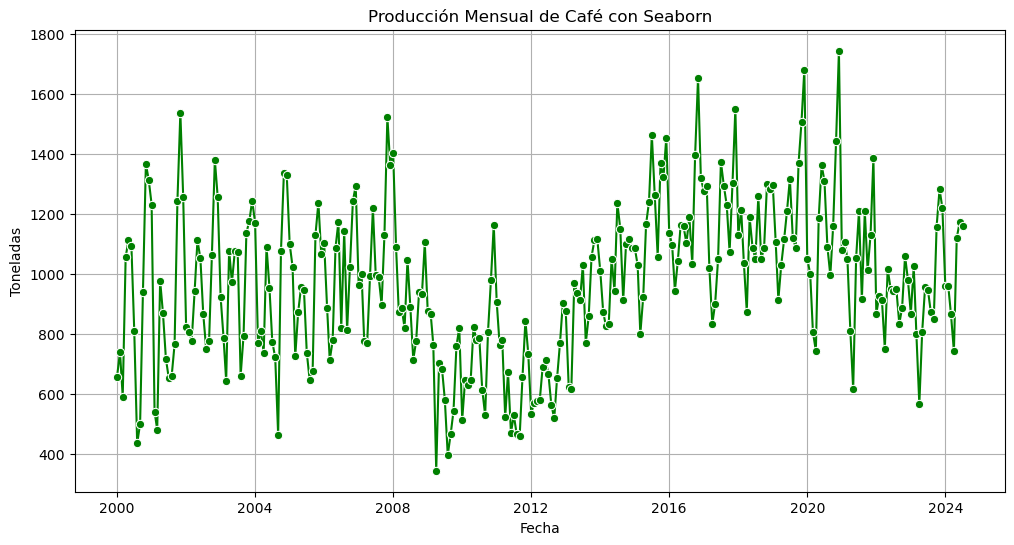

In [7]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=cafe, x=cafe.index, y="Toneladas", marker="o", color="g")
plt.xlabel("Fecha")
plt.ylabel("Toneladas")
plt.title("Producción Mensual de Café con Seaborn")
plt.grid(True)
plt.show()

## Supuestos para la toma de datos en series temporales

-   Observaciones consecutivas están igualmente espaciadas
-   Aplicar un índice de observación en el tiempo discreto
-   Lo anterior tal vez sólo pueda lograrse de forma aproximada




## Componentes de una serie temporal



- **Tendencia :** patrones dentro de los datos que reflejan el movimiento de la serie a lo largo del tiempo. La tendencia puede ser de naturaleza lineal o no lineal.

- **Estacionalidad :** los datos experimentan cambios repetitivos que se repiten cada año calendario.

- **Ciclicidad :** Los datos experimentan cambios que no son fijos y más allá del año calendario.

- **Aleatoriedad :** Movimientos o cambios desconocidos e irregulares en los datos.


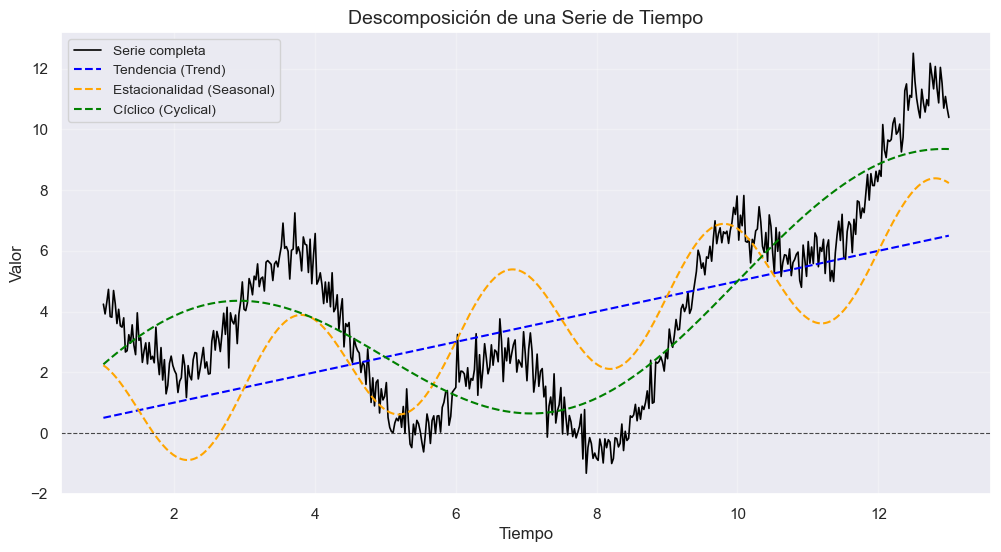

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
np.random.seed(42)
time = np.linspace(1, 13, 500)

# Componentes
trend = 0.5 * time
seasonal = 2 * np.sin(2 * np.pi * time / 3)
cyclical = 3 * np.sin(2 * np.pi * time / 10)
irregular = np.random.normal(0, 0.5, len(time))

# Serie completa (suma de las componentes)
series = trend + seasonal + cyclical + irregular

# Gráfica
plt.figure(figsize=(12, 6))
plt.plot(time, series, label='Serie completa', color='black', linewidth=1.2)
plt.plot(time, trend, label='Tendencia (Trend)', linestyle='--', color='blue')
plt.plot(time, seasonal + trend, label='Estacionalidad (Seasonal)', linestyle='--', color='orange')
plt.plot(time, cyclical + trend, label='Cíclico (Cyclical)', linestyle='--', color='green')

# Etiquetas
plt.title("Descomposición de una Serie de Tiempo", fontsize=14)
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()


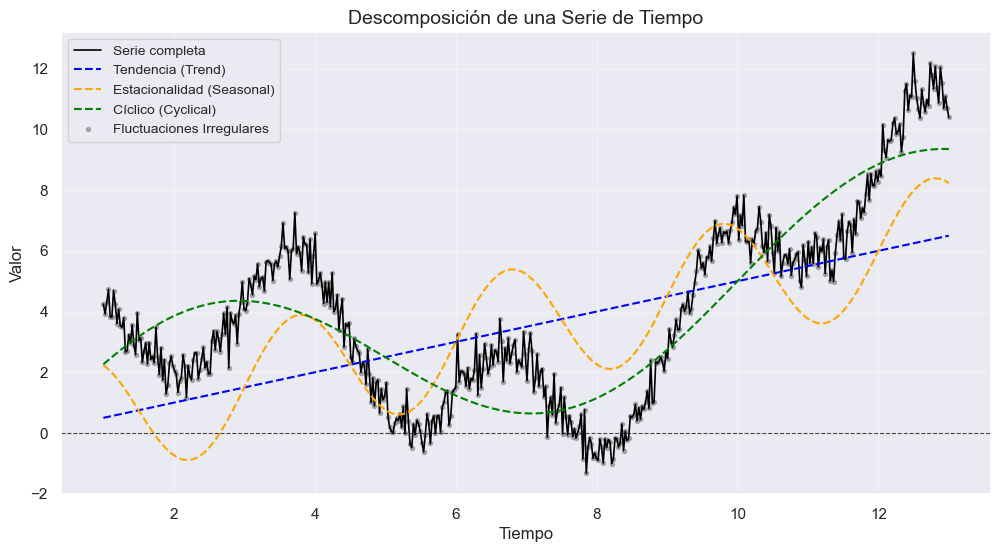

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
np.random.seed(42)  # Para reproducibilidad
time = np.linspace(1, 13, 500)  # Eje temporal

# Componentes
trend = 0.5 * time  # Tendencia lineal
seasonal = 2 * np.sin(2 * np.pi * time / 3)  # Estacionalidad (ciclo repetitivo)
cyclical = 3 * np.sin(2 * np.pi * time / 10)  # Ciclos (fluctuaciones más largas)
irregular = np.random.normal(0, 0.5, len(time))  # Fluctuaciones aleatorias

# Serie completa
series = trend + seasonal + cyclical + irregular

# Gráfica
plt.figure(figsize=(12, 6))
plt.plot(time, series, label='Serie completa', color='black', linewidth=1.2)
plt.plot(time, trend, label='Tendencia (Trend)', linestyle='--', color='blue')
plt.plot(time, trend + seasonal, label='Estacionalidad (Seasonal)', linestyle='--', color='orange')
plt.plot(time, trend + cyclical, label='Cíclico (Cyclical)', linestyle='--', color='green')
plt.scatter(time, series, s=8, label='Fluctuaciones Irregulares', color='gray', alpha=0.6)

# Etiquetas y leyenda
plt.title("Descomposición de una Serie de Tiempo", fontsize=14)
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()




$$X_{t}=T_{t}+E_{t}+I_{t}$$

donde: 

- $T_{t}$: es la tendencia 
- $E_{t}$: es la componente estacional 
- $I_{t}$: es la componente aleatoria.

**Tendencia :**  movimiento o dirección a largo plazo de los datos. Muestra el aumento o la disminución general a lo largo del tiempo.

Para hacer inferencias estadísticas en la estructura de un proceso estocástico (o serie de tiempo) sobre el histórico observado del proceso, normalmente se deben hacer algunas suposiciones simplificadoras (presumiblemente razonables) sobre esa estructura. El supuesto más importante es el de  **estacionariedad**.
	 

Dicho concepto tendrá dos versiones:

- Estacionariedad fuerte 
- Estacionariedad débil







## Estacionariedad Fuerte y Débil.

Una serie de tiempo se puede ver como un proceso estocástico, se dice que es estacionario si su media y varianza son constantes en el tiempo y si el valor de la covarianza entre 2 periodos depende sólo de la distancia o rezago entre los tiempos.

Sea $Y_t$ una serie de tiempo con las siguientes propiedades se dice que es debilmente estacionaria o simplemente estacionaria:



 * $E(y_t)$ es  constante para todo $t$.
 * $Var(y_t)$ es constante para todo $t$ y,
 * $Cov(y_t,y_{t+h})$ sólo depende de $h$ para cualquier $t$
 
 La condición adicional para que una serie de tiempo sea fuertemente estacionaria es que la distribución conjunta de $Y_{t_1},Y_{t_2}, \cdots, Y_{t_n}$ es la misma que la distribución conjunta de $Y_{t_1-k}, Y_{t_2-k}, \cdots, Y_{t_n-k}$ para todas las opciones de puntos de tiempo $t_1, t_2, \cdots, t_n$ y todas las opciones de rezago temporal $k$. es decir, la distribución sólo depende de la diferencia de tiempo $h$ y no del tiempo $(t_1,...,t_k)$



<span style="color: red;">
*En la práctica, buscamos que los datos sean estacionarios para poder proseguir con el tratamiento estadístico de los mismos.*
</span>



<span style="color: red;">
**La estacionariedad es un concepto fundamental para el análisis
de las series de tiempo.** 
</span>




- La estacionariedad significa que el proceso mediante el cual se crearon los datos, es constante en el tiempo.

-  **CUIDADO**: Esto no significa que los datos no puedan cambiar. Significa que los supuestos distribucionales del mecanismo que genera los datos son constantes en el
tiempo.
- El punto de partida de la metodología Box-Jenkins es la estacionariedad. De ahí su importancia práctica.




## Asi se ve la no estacionariedad


!["No estacionariedad"](https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/bases/noestacionariedad.jpg)



![Estacionariedad vs no estacionariedad](https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/bases/estavsnoest.jpg)




<span style= "color: #5a8d84 ">

## **Ruido Blanco**

</span>


El objetivo de las Series Temporales es descomponer la serie observada en dos partes: una es la parte dependiente del pasado y la otra la parte impredecible

$$Y_t=f(Y_{(t-1)}, Y_{(t-2)},....,Y_1)+ a_t $$

- Si todas las series que observamos en la realidad fuesen Ruido Blanco serían impredecibles y no habría ningún modelo que proponer.


Un **Ruido Blanco** es una serie tal que su media es cero, la varianza es constante y es incorrelacionada.


* $E(a_t)=0$
* $Var(a_t)=\sigma_a^2$
* $cov(a_t,a_{t+_h})=0$



Se trata de un proceso en el que todas sus variables son independientes.


In [2]:
import pandas as pd
import numpy as np
import datetime as dt

ipc=pd.read_excel("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/IPC.xlsx")
ipc

,Año(aaaa)-Mes(mm),Índice,Inflación anual %,Inflación mensual %,Inflación año corrido %
0,200001,40.30,8.25,1.29,1.29
1,200002,41.23,8.89,2.30,3.62
2,200003,41.93,9.73,1.71,5.39
3,200004,42.35,9.96,1.00,6.44
4,200005,42.57,10.00,0.52,7.00
...,...,...,...,...,...
278,202303,131.77,13.34,1.05,4.56
279,202304,132.80,12.82,0.78,5.38
280,202305,133.38,12.36,0.43,5.83
281,202306,133.78,12.13,0.30,6.15


In [3]:
ipc.index=pd.to_datetime(ipc["Año(aaaa)-Mes(mm)"].astype(str), format="%Y%m")

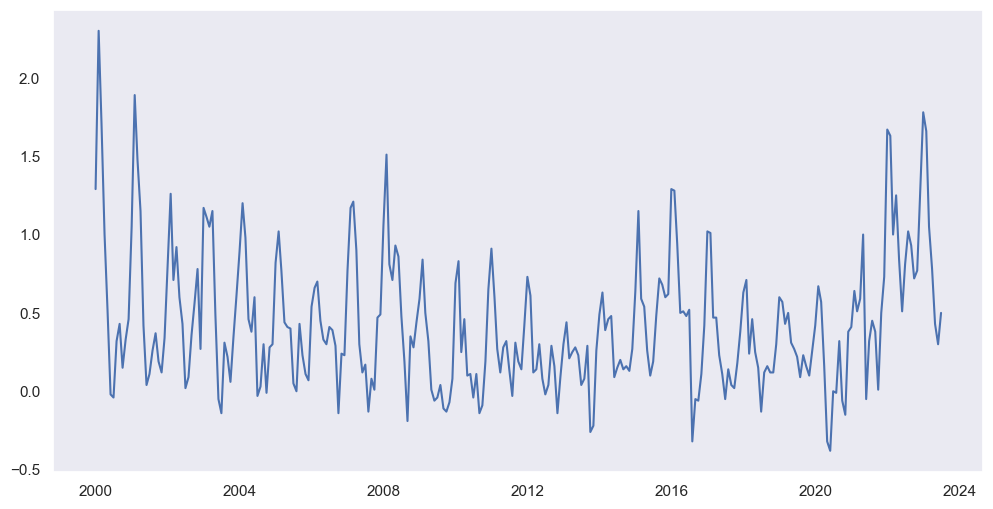

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(ipc.index, ipc["Inflación mensual %"])
# Configurar el formato de las fechas en el eje x


In [5]:
import plotly.express as px

In [6]:
px.line(data_frame=ipc, x=ipc.index, y=ipc["Inflación mensual %"])

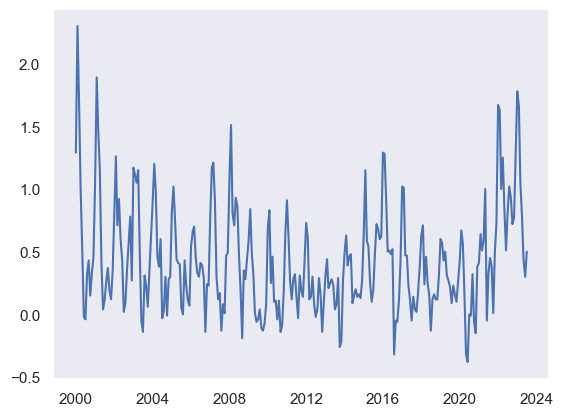

In [7]:
plt.plot(ipc.index, ipc["Inflación mensual %"])